## Runs DE on different clusters. Also runs DE within each cluster for each condition.
Does this over each donor and combined

In [1]:
# Input info
# se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/SE.rds"
# sample_names = "preB,postB"
# outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnCond_RNA/minPct_0_logfc0.01"
# top_de = 3
# se_f = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/SE.rds" 
# outdir = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones"
# top_de = 3
# sample_names = "pre,post"


se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/SE.rds"
large_clones_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/annotation_clones/DE_large/large_clones.csv"
n_clones_to_plot = 15
top_clones = 40

p_thresh = 0.1 
outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA/" 
top_de = 3
sample_names = "preB,postB"

# Input info
# se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/SE.rds"
# sample_names = "preB,postB"
# outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1"


# Parallel processing
cores = 4

# R utils script
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"



# Parameters
assay="RNA"
minPct = 0.00
logfcthresh = 0.1
test.use="wilcox"
latent.vars = "NULL"


In [2]:
large_clones <- read.csv(large_clones_f)
large_clones <- large_clones[with(large_clones, order(-norm.total,total)), ]
large_clones

clones.for.de <- head(large_clones, top_clones)$name
clones.for.de

,X,donor,lineage,norm.total,total,name,cdf.norm,cdf,index
,<int>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<int>
8,8,3,14,0.5310047,87,3_14,0.2655024,87,1
3,3,2,19,0.4882479,30,2_19,0.2441239,30,1
1,1,0,4,0.4267738,35,0_4,0.2133869,35,1
4,4,2,10,0.4262821,33,2_10,0.4572650,63,2
9,9,3,0,0.3759812,73,3_0,0.4534929,160,2
5,5,1,1,0.3234890,43,1_1,0.1617445,43,1
2,2,0,13,0.3223166,27,0_13,0.3745452,62,2
6,6,1,15,0.2660256,36,1_15,0.2947573,79,2
10,10,3,4,0.2407490,49,3_4,0.5738675,209,3


[1] "3_14" "2_19" "0_4"  "2_10" "3_0"  "1_1"  "0_13" "1_15" "3_4"  "1_13"

In [3]:
source(utils_script)
source("/data/Mito_Trace/R_scripts/plot_de_over_all.R")
dir.create(outdir, showWarnings = FALSE)

btwnConds_inClone_sepDonors.outdir <- file.path(outdir, "btwnConds_inClone_sepDonrs")
dir.create(btwnConds_inClone_sepDonors.outdir)


Attaching SeuratObject

Warning message in dir.create(btwnConds_inClone_sepDonors.outdir):
“'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs' already exists”


In [4]:
sample_names <- unlist(strsplit(sample_names, ",")[[1]])
sample_names

[1] "preB"  "postB"

In [5]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library("RColorBrewer")
library(dplyr)
library(future)
plan()

plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Lo

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."


In [6]:
se <- readRDS(se_f)#file.path(indir, paste0("allSamples.integrated.rds")))
se

An object of class Seurat 
61893 features across 4112 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

### Filter for top_clones for DE

In [7]:
#se = subset(se, subset = (name %in% clones.for.de))

# Stimulus specific response in each clone
Loop through names and then run de btwn the conditions

In [8]:
all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                          row.names=row.names(se))
all.names.sig <- c()

#sample_names
clone.ids <- sort(unique(se$name))
se$clone.stim <- paste(se$name, se$orig.ident, sep = "_")

se$clone <- se$name
Idents(se) <- "clone.stim"

for (curr.clone in clone.ids ){ #clones.for.de){
    ident.1 = paste0(curr.clone, "_", sample_names[[1]]) 
    ident.2 = paste0(curr.clone, "_", sample_names[[2]])
    try({
        print(curr.clone)
        curr.name <-paste0("clone_", curr.clone)
        curr.clone.outdir <- file.path(btwnConds_inClone_sepDonors.outdir, paste0("clone_", curr.clone))
        dir.create(curr.clone.outdir)

        curr.sig <- find.markers.and.plot(se, ident.1, ident.2, curr.clone.outdir, 
                                          curr.name=curr.clone, assay="RNA", logfcthresh=logfcthresh,
                                          min.pct=minPct, p.thresh=p_thresh, mean.fxn=NULL, fc.name=NULL)
        names.sig <- rownames(curr.sig)
        all.names.sig <- c(all.names.sig, head(names.sig, top_de))
        
        all.pvals[names.sig,curr.clone] <- curr.sig$p_val_adj_BH

        curr_clone <- subset(se, subset = name == curr.clone)
        avg_curr_clone <- data.frame(log1p(AverageExpression(curr_clone, verbose = FALSE)$RNA))
        avg_curr_clone$gene <- rownames(avg_curr_clone)
        p1 <- ggplot(avg_curr_clone, aes_string(paste0("X", curr.clone, "_", sample_names[[1]]), 
                                                paste0("X", curr.clone, "_", sample_names[[2]]))) + geom_point() + ggtitle(paste("Cluster", curr.clone))
        p1 <- LabelPoints(plot = p1, points = head(names.sig,3), repel = TRUE)
        plot_grid(p1)
        #write.csv(response, file=file.path(curr.clone.outdir,paste0("clone_",c,".conditionDE.csv")))
        ggsave(file.path(curr.clone.outdir,paste0("clone_",curr.clone,".allDonors.conditionScatter.png")))
        
        })
    }
     



[1] "0_0"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 41 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
              p_val avg_log2FC pct.1 pct.2  p_val_adj p_val_adj_BH
TCF25  2.512671e-06  0.6542706 0.773 0.000 0.04918554   0.02054611
ARID5A 6.682782e-06  0.7525642 0.727 0.000 0.13081547   0.02732256
PAPD5  1.117779e-05  0.6123829 0.773 0.053 0.21880530   0.03046694
DNPEP  3.383943e-05  0.5460845 0.864 0.158 0.66240676   0.06820880
FAAP20 4.170771e-05  0.6108989 0.636 0.000 0.81642850   0.06820880
TMBIM6 9.338174e-05  0.5714326 0.864 0.211 1.00000000   0.08759239
[1] "dim response"
[1] 8177    6


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "gally"
[1] "p_val"        "avg_log2FC"   "pct.1"        "pct.2"        "p_val_adj"   
[6] "p_val_adj_BH"


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "0_1"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 37 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 9233    6
Error in LabelPoints(plot = p1, points = head(names.sig, 3), repel = TRUE) : 
  Cannot find points provided
[1] "0_10"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 23 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 9645    6
Error in LabelPoints(plot

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_0_13' already exists"


[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 18 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "0_14"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 18 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
              p_val avg_log2FC pct.1 pct.2 p_val_adj p_val_adj_BH
UGGT1  6.551636e-05  0.7418288   1.0     0         1   0.06478034
RPL29  6.551636e-05  0.6192763   1.0     0         1   0.06478034
LRRC14 6.551636e-05  0.6592473   1.0     0         1   0.06478034
PNPLA7 6.551636e-05  0.8144293   1.0     0         1   0.06478034
GNB1   

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "gally"
[1] "p_val"        "avg_log2FC"   "pct.1"        "pct.2"        "p_val_adj"   
[6] "p_val_adj_BH"


Saving 6.67 x 6.67 in image

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "0_15"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 16 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 10143     6
Error in LabelPoints(plot = p1, points = head(names.sig, 3), repel = TRUE) : 
  Cannot find points provided
[1] "0_16"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 15 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 9644    6
Error in LabelPoints(p

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "gally"
[1] "p_val"        "avg_log2FC"   "pct.1"        "pct.2"        "p_val_adj"   
[6] "p_val_adj_BH"


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "0_30"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 0_30_postB
[1] "0_31"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 8 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "0_32"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 8 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "0_33"
[1] "se filt before"
[1] "se filt"


Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_0_4' already exists"


[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 25 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
                p_val avg_log2FC pct.1 pct.2 p_val_adj p_val_adj_BH
PSMA6    1.425090e-05  0.6145885 0.889 0.000 0.2789613   0.02429744
SDF2L1   1.425090e-05  0.4993362 0.889 0.000 0.2789613   0.02429744
SLC25A12 2.135184e-05  0.7907555 1.000 0.062 0.4179623   0.02429744
CCDC77   4.938406e-05  0.5542746 1.000 0.062 0.9666929   0.02429744
ZBTB8OS  5.851321e-05  0.6205012 0.889 0.062 1.0000000   0.02429744
DNTTIP2  7.274625e-05  0.5215686 0.778 0.000 1.0000000   0.02429744
[1] "dim response"
[1] 9047    6


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "gally"
[1] "p_val"        "avg_log2FC"   "pct.1"        "pct.2"        "p_val_adj"   
[6] "p_val_adj_BH"


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



[1] "0_5"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 0_5_preB
[1] "0_6"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 25 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 8544    6
Error in LabelPoints(plot = p1, points = head(names.sig, 3), repel = TRUE) : 
  Cannot find points provided
[1] "0_7"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 25 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_1_1' already exists"


[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 30 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 9032    6
Error in LabelPoints(plot = p1, points = head(names.sig, 3), repel = TRUE) : 
  Cannot find points provided
[1] "1_10"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 21 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 9846    6
Error in LabelPoints(plot = p1, poi

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_1_13' already exists"


[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 16 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 10462     6
Error in LabelPoints(plot = p1, points = head(names.sig, 3), repel = TRUE) : 
  Cannot find points provided
[1] "1_14"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 17 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 9745    6
Error in LabelPoints(plot = p1, p

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_1_15' already exists"


[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 16 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 10259     6
Error in LabelPoints(plot = p1, points = head(names.sig, 3), repel = TRUE) : 
  Cannot find points provided
[1] "1_16"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 16 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 10391     6
Error in LabelPoints(plot = p1,

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_2_10' already exists"


[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 11 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
[1] "curr sig"
[1] p_val        avg_log2FC   pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 9839    6
Error in LabelPoints(plot = p1, points = head(names.sig, 3), repel = TRUE) : 
  Cannot find points provided
[1] "2_11"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 11 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 2 has fewer than 3 cells
[1] "2_12"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
6189

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_2_19' already exists"


[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 10 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 2 has fewer than 3 cells
[1] "2_2"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 17 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 2 has fewer than 3 cells
[1] "2_20"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 10 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reduc

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_3_0' already exists"


[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_0_preB
[1] "3_1"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_1_preB
[1] "3_10"
[1] "se filt before"
[1] "se filt"
An object of class Seurat 
61893 features across 66 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 2 has fewer than 3 cells
[1] "3_11"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_11_preB
[1] "3_12"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_3_14' already exists"


[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_14_preB
[1] "3_15"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_15_preB
[1] "3_16"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_16_preB
[1] "3_17"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_17_preB
[1] "3_18"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_18_preB
[1] "3_19"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the obj

Warning message in dir.create(curr.clone.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA//btwnConds_inClone_sepDonrs/clone_3_4' already exists"


[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_4_preB
[1] "3_40"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_40_preB
[1] "3_41"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_41_preB
[1] "3_42"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_42_preB
[1] "3_43"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: 3_43_preB
[1] "3_44"
[1] "se filt before"
Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the obje

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "gally"
[1] "p_val"        "avg_log2FC"   "pct.1"        "pct.2"        "p_val_adj"   
[6] "p_val_adj_BH"


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'XNone_preB' not found


In [9]:
all.pvals[rowSums(is.na(all.pvals)) != ncol(all.pvals), ]


,0_0,0_1,0_10,0_14,0_15,0_16,0_17,0_18,0_19,0_2,⋯,2_20,2_24,2_25,2_29,2_3,2_30,2_4,2_6,2_7,None
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NOC2L,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
KLHL17,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AGRN,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACAP3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PUSL1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
DVL1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AURKAIP1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCNL2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ATAD3B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## DE sig summarize

In [10]:
all.names.sig

[1] "TCF25"    "ARID5A"   "PAPD5"    "UGGT1"    "RPL29"    "LRRC14"  
 [7] "AGO3"     "ACADM"    "PIGK"     "PSMA6"    "SDF2L1"   "SLC25A12"
[13] "TSSC1"

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

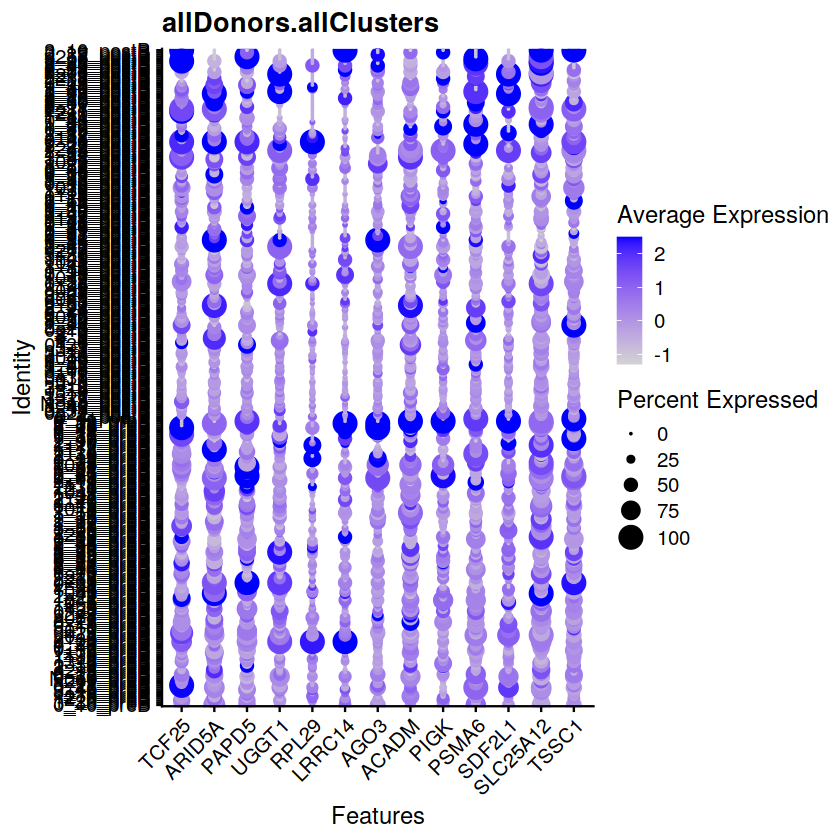

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



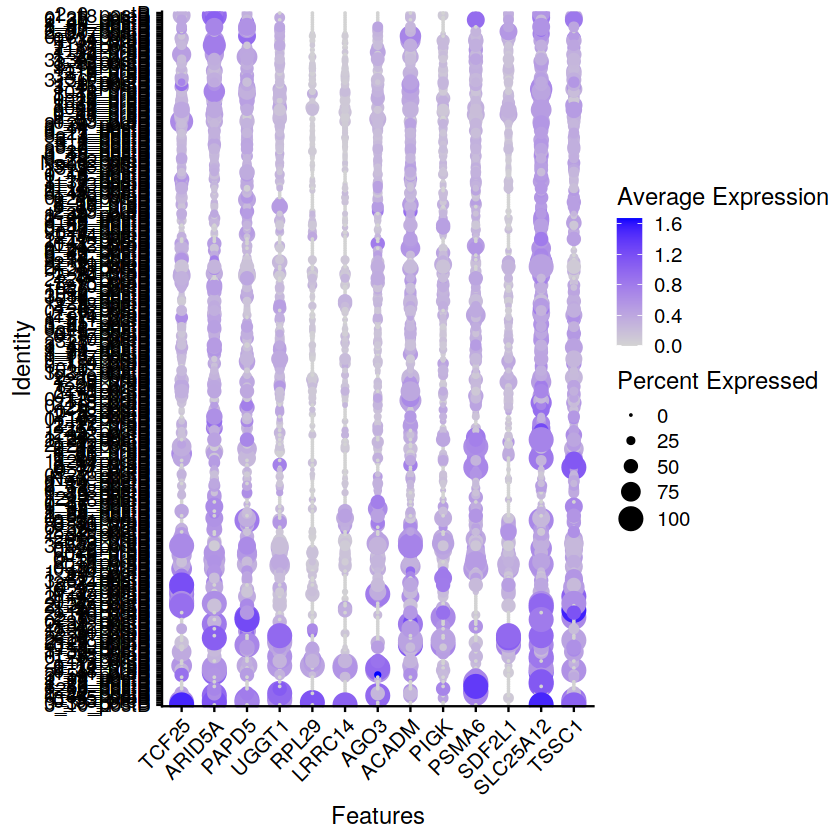

In [11]:
### a) top 3 significant results from each comparison

all.names.sig <- unique(all.names.sig)
de.plots(se, all.names.sig, btwnConds_inClone_sepDonors.outdir, curr.name="allDonors.allClusters", max.size=15)

dot <- DotPlot(se, scale=FALSE,
               features = head(all.names.sig,20), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(btwnConds_inClone_sepDonors.outdir, "allDonors.allClusters.top3de.png"))
ggsave(file.path(btwnConds_inClone_sepDonors.outdir, "allDonors.allClusters.top3de.pdf"))


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



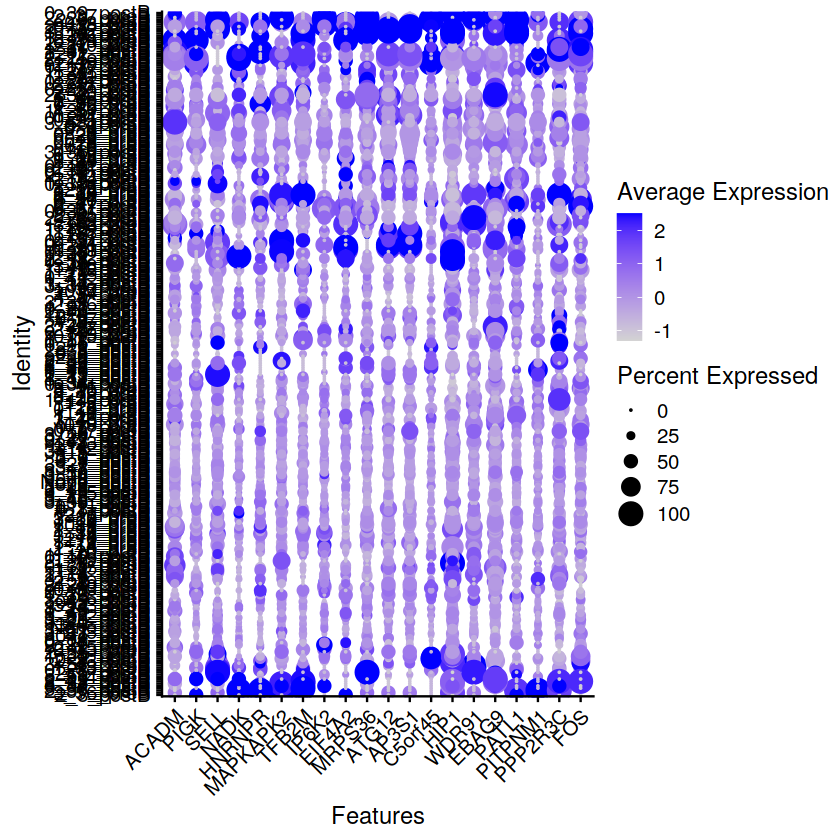

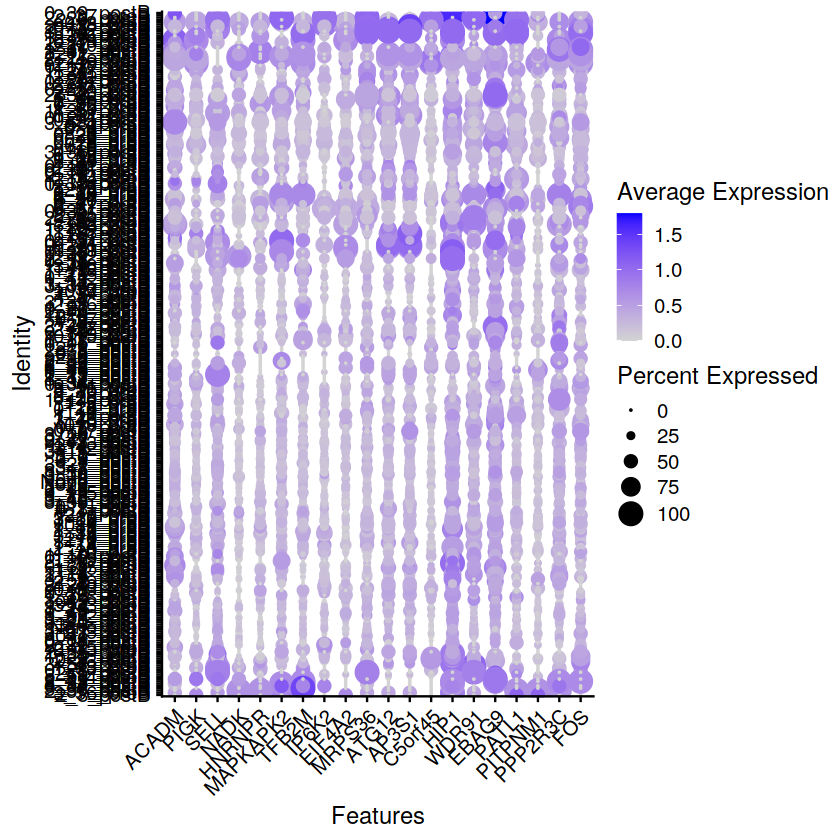

In [12]:

## b) averaged top p-values (only average ones that were DE)

sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=T,
               features = names(head(sig.all.ordered,20)), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(btwnConds_inClone_sepDonors.outdir, "allDonors.allClusters.pvalsOrdered.png"))
ggsave(file.path(btwnConds_inClone_sepDonors.outdir, "allDonors.allClusters.pvalsOrdered.pdf"))
#de.plots(se, names(sig.all.ordered), outdir, curr.name="allDonors.allClusters.pvalsOrdered", max.size=20)

sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=F,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=T) + RotatedAxis()
dot


In [13]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/isaac/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] future_1.23.0             dplyr_1.0.7              
 [3] RColorBrewer_1.1-2        metap_1.1                
 [5] cowplot_1.1.1             magrittr_2.0.1           
 [7] data.table_1.14.2         patchwork_1.1.1          
 [9] ggplot2_3.3.5             EnsDb.Hsapiens.v75_2.99.0
[11] 

In [14]:
outdir

[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA/"